### Part 0: Vector Transformations

import library

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

# **Introduction**

This notebook explores how vectors and linear transformations behave in three-dimensional space.  
We begin with simple geometric objects—vectors in $\mathbb{R}^3$—and gradually build up to rich concepts such as:

- linear combinations of vectors,  
- non-unique transformations that map one vector to another,  
- rotations expressed through basis transformations,  
- the geometric meaning of rank and orthogonality,  
- combining multiple rotations into a single linear map,  
- and animating how a transformation evolves continuously with an angle parameter.


## **Purpose of This Notebook**

By the end of this exploration, you will have:

- visualized vectors and linear combinations,  
- experimented with non-unique linear maps,  
- derived rotation matrices from geometric principles,  
- compared rotations with general linear transformations,  
- combined rotations into a new linear operator,  
- and animated a transformation in 3D.

The aim is to build strong geometric intuition behind linear algebra and transformations.

---


# **Vector Plotting and Linear Combination in 3D Space**

We work in the real 3-dimensional vector space $\mathbb{R}^3$ equipped with the standard orthonormal basis  

$$
\hat{i} =
\begin{bmatrix}
1\\0\\0
\end{bmatrix},
\qquad
\hat{j} =
\begin{bmatrix}
0\\1\\0
\end{bmatrix},
\qquad
\hat{k} =
\begin{bmatrix}
0\\0\\1
\end{bmatrix}.
$$

Consider the vector  

$$
\vec{u} =
\begin{bmatrix}
2 \\
2 \\
2
\end{bmatrix},
$$

and the additional vectors  

$$
\vec{v} =
\begin{bmatrix}
1 - \sqrt{3} \\
1 + \sqrt{3} \\
2
\end{bmatrix},
\qquad
\vec{w} =
\begin{bmatrix}
2 \\
1 - \sqrt{3} \\
1 + \sqrt{3}
\end{bmatrix}.
$$

---

## **Tasks**

### **1) Plotting the vectors $\vec{u}, \vec{v}, \vec{w}$**

Plot the three vectors  

$$
\vec{u},\quad \vec{v},\quad \vec{w}
$$

in the $xyz$-coordinate system with basis $(\hat{i}, \hat{j}, \hat{k})$.

Each vector should be drawn as an arrow starting at the origin and pointing toward its endpoint.

---

### **2) Plotting the linear combination $\vec{s}$**

Define the vector

$$
\vec{s}
= \frac{\vec{v}}{\sqrt{2}} + \frac{\vec{w}}{\sqrt{2}}
= \frac{1}{\sqrt{2}}(\vec{v} + \vec{w}).
$$

Explicitly,

$$
\vec{s}
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
(1 - \sqrt{3}) + 2 \\
(1 + \sqrt{3}) + (1 - \sqrt{3}) \\
2 + (1 + \sqrt{3})
\end{bmatrix}
=
\begin{bmatrix}
\dfrac{3 - \sqrt{3}}{\sqrt{2}} \\
\dfrac{2}{\sqrt{2}} \\
\dfrac{3 + \sqrt{3}}{\sqrt{2}}
\end{bmatrix}.
$$

Plot the vector $\vec{s}$ on the same coordinate axes.

---


* Python Code:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D plots)

# --- Define vectors ---
u = np.array([2, 2, 2], dtype=float)
v = np.array([1 - np.sqrt(3), 1 + np.sqrt(3), 2], dtype=float)
w = np.array([2, 1 - np.sqrt(3), 1 + np.sqrt(3)], dtype=float)

sqrt2 = np.sqrt(2)


#-----------------------------------------------
"""
Linear combination: s = v/√2 + w/√2
TASK: Write down the linear combination of u and v #
"""
s = # Write down the linear combination of u and v

"""
TASK: check each vectors and print out u, v, w, s #
"""
print("u =", u)
#-----------------------------------------------



u = [2. 2. 2.]
v = [-0.73205081  2.73205081  2.        ]
w = [ 2.         -0.73205081  2.73205081]
s = v/√2 + w/√2 = [0.89657547 1.41421356 3.34606521]


In [ ]:
# --- Helper function to draw a vector from origin in 3D ---
def draw_vector(ax, vec, color, label):
    ax.quiver(0, 0, 0,
              vec[0], vec[1], vec[2],
              arrow_length_ratio=0.1,
              color=color,
              label=label)
#* No need to make adjustment here

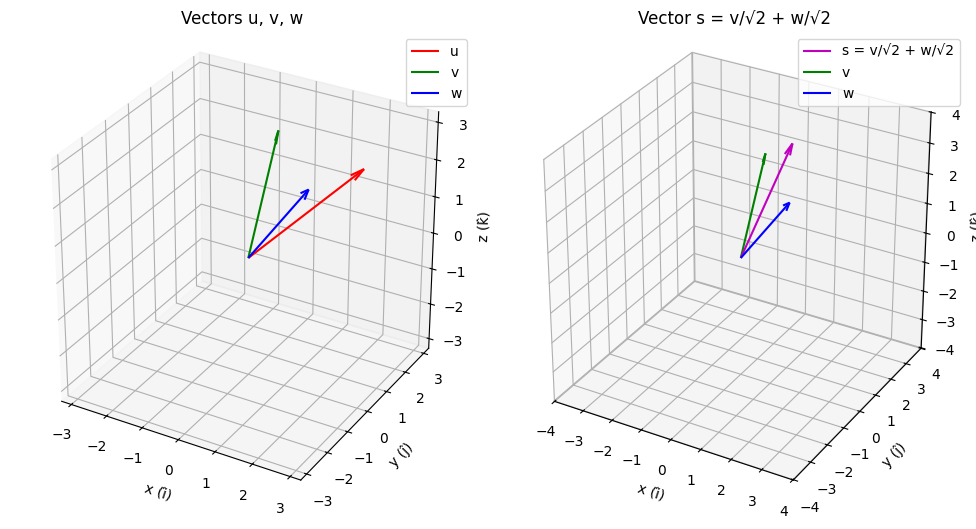

In [ ]:
# --- Plotting ---
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')


#-----------------------------------------------
"""
TASK: Draw vector v, w on figure ax1
"""
draw_vector(ax1, u, color='r', label='u')
draw_vector(ax1, v, color='r', label='v') # plot this
draw_vector(ax1, w, color='r', label='w') # plot this
# Draw other vectors
ax1.set_xlabel('x (î)')
ax1.set_ylabel('y (ĵ)')
ax1.set_zlabel('z (k̂)')
ax1.set_title('Vectors u, v, w')
#-----------------------------------------------


# Make the axes limits a bit larger than all components
all_points = np.vstack([u, v, w])
max_range = np.max(np.abs(all_points)) * 1.2
for axis in [ax1.set_xlim, ax1.set_ylim, ax1.set_zlim]:
    axis(-max_range, max_range)

ax1.set_box_aspect([1, 1, 1])  # equal aspect
ax1.legend()



#-----------------------------------------------
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
"""
TASK: Draw vector s, v, w on figure ax2
"""
draw_vector(ax2, s, color='m', label='s = v/√2 + w/√2')
draw_vector(ax2, v, color='g', label='v')# plot this
draw_vector(ax2, w, color='b', label='w')# plot this
#draw_vector()
# Draw other vectors
ax2.set_xlabel('x (î)')
ax2.set_ylabel('y (ĵ)')
ax2.set_zlabel('z (k̂)')
ax2.set_title('Vector s = v/√2 + w/√2')
#-----------------------------------------------


max_range_s = np.max(np.abs(s)) * 1.2
for axis in [ax2.set_xlim, ax2.set_ylim, ax2.set_zlim]:
    axis(-max_range_s, max_range_s)

ax2.set_box_aspect([1, 1, 1])
ax2.legend()

plt.tight_layout()
plt.show()

# Exploring Linear Transformations and Non-Uniqueness (with Python)

We work in standard 3D Euclidean space with basis vectors
$$
\hat{i}=
\begin{bmatrix}1\\0\\0\end{bmatrix},\quad
\hat{j}=
\begin{bmatrix}0\\1\\0\end{bmatrix},\quad
\hat{k}=
\begin{bmatrix}0\\0\\1\end{bmatrix}.
$$

Consider the vectors
$$
\vec{u}=
\begin{bmatrix}
2\\2\\2
\end{bmatrix},\qquad
\vec{v}=
\begin{bmatrix}
1-\sqrt{3}\\[4pt]
1+\sqrt{3}\\[4pt]
2
\end{bmatrix},\qquad
\vec{w}=
\begin{bmatrix}
2\\[4pt]
1-\sqrt{3}\\[4pt]
1+\sqrt{3}
\end{bmatrix}.
$$

We also define the linear combination
$$
\vec{s}
=
\frac{\vec{v}}{\sqrt{2}}+\frac{\vec{w}}{\sqrt{2}}.
$$

You will use Python to explore how different matrices can map
$$
\vec{u}\mapsto\vec{v},\qquad \vec{u}\mapsto\vec{w},\qquad \vec{u}\mapsto\vec{s},
$$
and to discover that such transformations are **not unique** when only the image of a single vector is specified.

---

## 🧩 Task 1 — Visualising the Vectors (Done in previous part)

1. Use Python to plot the vectors
   $$
   \vec{u},\ \vec{v},\ \vec{w}
   $$
   in a 3D coordinate system with axes labelled by $\hat{i}, \hat{j}, \hat{k}$.

2. Compute
   $$
   \vec{s}=\frac{\vec{v}}{\sqrt{2}}+\frac{\vec{w}}{\sqrt{2}}
   $$
   and plot $\vec{s}$ on the same or a separate 3D plot.

Focus on understanding the geometric relations between these vectors.

---

## 🧩 Task 2 — Testing Linear Transformations

We now look for $3\times 3$ matrices $B$ and $C$ that satisfy
$$
\vec{v}=B\vec{u},\qquad \vec{w}=C\vec{u}.
$$

Below are **five candidate matrices** $B_1,\dots,B_5$ (for mapping $\vec{u}$ to $\vec{v}$) and  
**five candidate matrices** $C_1,\dots,C_5$ (for mapping $\vec{u}$ to $\vec{w}$).

Your job in this task is to:

- Use Python to test each $B_i$ by computing $B_i\vec{u}$ and comparing it to $\vec{v}$.
- Use Python to test each $C_i$ by computing $C_i\vec{u}$ and comparing it to $\vec{w}$.
- Observe that **more than one matrix** can perform the same mapping from $\vec{u}$ to $\vec{v}$ (or $\vec{u}$ to $\vec{w}$).

You are *not* asked here to classify which matrices are “nice”, “rotations”, “projections”, etc.  
The goal is simply to realise through computation that the transformation is **not uniquely determined** by specifying the image of a single vector.

---

### Candidate matrices for \(B\) (map \($\vec{u}$\) to \($\vec{v}$\))

Let
$$
B_1 =
\begin{bmatrix}
\dfrac{1}{2} & -\dfrac{\sqrt{3}}{2} & 0 \\
\dfrac{\sqrt{3}}{2} & \dfrac{1}{2} & 0 \\
0 & 0 & 1
\end{bmatrix},
$$

$$
B_2 =
\begin{bmatrix}
\dfrac{1}{6} - \dfrac{\sqrt{3}}{6} & \dfrac{1}{6} - \dfrac{\sqrt{3}}{6} & \dfrac{1}{6} - \dfrac{\sqrt{3}}{6} \\
\dfrac{1}{6} + \dfrac{\sqrt{3}}{6} & \dfrac{1}{6} + \dfrac{\sqrt{3}}{6} & \dfrac{1}{6} + \dfrac{\sqrt{3}}{6} \\
\dfrac{1}{3} & \dfrac{1}{3} & \dfrac{1}{3}
\end{bmatrix},
$$

$$
B_3 =
\begin{bmatrix}
\dfrac{1}{2} - \dfrac{\sqrt{3}}{2} & 0 & 0 \\
0 & \dfrac{1}{2} + \dfrac{\sqrt{3}}{2} & 0 \\
0 & 0 & 1
\end{bmatrix},
$$

$$
B_4 =
\begin{bmatrix}
\dfrac{1}{2} - \dfrac{\sqrt{3}}{2} & 1 & -1 \\
0 & \dfrac{1}{2} + \dfrac{\sqrt{3}}{2} & 0 \\
0 & 0 & 1
\end{bmatrix},
$$

$$
B_5 =
\begin{bmatrix}
\dfrac{1}{4} - \dfrac{\sqrt{3}}{4} & \dfrac{1}{4} - \dfrac{\sqrt{3}}{4} & 0 \\
\dfrac{1}{4} + \dfrac{\sqrt{3}}{4} & \dfrac{1}{4} + \dfrac{\sqrt{3}}{4} & 0 \\
\dfrac{1}{2} & \dfrac{1}{2} & 0
\end{bmatrix}.
$$

---

### Candidate matrices for \(C\) (map \($\vec{u}$\) to \($\vec{w}$\))

Let
$$
C_1 =
\begin{bmatrix}
1 & 0 & 0 \\
0 & \dfrac{1}{2} & -\dfrac{\sqrt{3}}{2} \\
0 & \dfrac{\sqrt{3}}{2} & \dfrac{1}{2}
\end{bmatrix},
$$

$$
C_2 =
\begin{bmatrix}
\dfrac{1}{3} & \dfrac{1}{3} & \dfrac{1}{3} \\
\dfrac{1}{6} - \dfrac{\sqrt{3}}{6} & \dfrac{1}{6} - \dfrac{\sqrt{3}}{6} & \dfrac{1}{6} - \dfrac{\sqrt{3}}{6} \\
\dfrac{1}{6} + \dfrac{\sqrt{3}}{6} & \dfrac{1}{6} + \dfrac{\sqrt{3}}{6} & \dfrac{1}{6} + \dfrac{\sqrt{3}}{6}
\end{bmatrix},
$$

$$
C_3 =
\begin{bmatrix}
1 & 0 & 0 \\
0 & \dfrac{1}{2} - \dfrac{\sqrt{3}}{2} & 0 \\
0 & 0 & \dfrac{1}{2} + \dfrac{\sqrt{3}}{2}
\end{bmatrix},
$$

$$
C_4 =
\begin{bmatrix}
1 & 1 & -1 \\
0 & \dfrac{1}{2} - \dfrac{\sqrt{3}}{2} & 0 \\
0 & 0 & \dfrac{1}{2} + \dfrac{\sqrt{3}}{2}
\end{bmatrix},
$$

$$
C_5 =
\begin{bmatrix}
\dfrac{1}{2} & \dfrac{1}{2} & 0 \\
\dfrac{1}{4} - \dfrac{\sqrt{3}}{4} & \dfrac{1}{4} - \dfrac{\sqrt{3}}{4} & 0 \\
\dfrac{1}{4} + \dfrac{\sqrt{3}}{4} & \dfrac{1}{4} + \dfrac{\sqrt{3}}{4} & 0
\end{bmatrix}.
$$

---

## 🧩 Task 3 — Constructing a Transformation to \($\vec{s}$\)

Recall
$$
\vec{s}=\frac{\vec{v}}{\sqrt{2}}+\frac{\vec{w}}{\sqrt{2}}.
$$

Suppose that, for some choice of $B$ and $C$ from the lists above, you have verified
$$
\vec{v}=B\vec{u},\qquad \vec{w}=C\vec{u}.
$$

1. Show (algebraically) that
   $$
   \vec{s}
   =
   \frac{1}{\sqrt{2}}B\vec{u}
   +
   \frac{1}{\sqrt{2}}C\vec{u}
   =
   A\vec{u},
   \quad\text{where}\quad
   A=\frac{1}{\sqrt{2}}B+\frac{1}{\sqrt{2}}C.
   $$

2. Using Python:
   - Choose any pair $(B,C)$ from the candidates that you have verified.
   - Form the matrix
     $$
     A=\frac{1}{\sqrt{2}}(B+C).
     $$
   - Check numerically that
     $$
     A\vec{u}=\vec{s}.
     $$

Try at least two different choices of $(B,C)$ and observe how the resulting matrices $A$ differ, even though they all send $\vec{u}$ to the same vector $\vec{s}$.

---

Matrices B1 t0 B5 and C1 to C5 is written below for your convenience

In [6]:
import numpy as np

# --- Define vectors u, v, w ---
sqrt3 = np.sqrt(3)

u = np.array([2.0, 2.0, 2.0])
v = np.array([1 - sqrt3, 1 + sqrt3, 2.0])
w = np.array([2.0, 1 - sqrt3, 1 + sqrt3])

print("u =", u)
print("v =", v)
print("w =", w)

# --- Define candidate B matrices ---

B1 = np.array([
    [0.5,       -sqrt3/2, 0.0],
    [sqrt3/2,    0.5,      0.0],
    [0.0,        0.0,      1.0],
])

B2 = np.array([
    [1/6 - sqrt3/6, 1/6 - sqrt3/6, 1/6 - sqrt3/6],
    [1/6 + sqrt3/6, 1/6 + sqrt3/6, 1/6 + sqrt3/6],
    [1/3,           1/3,           1/3          ],
])

B3 = np.array([
    [0.5 - sqrt3/2, 0.0,              0.0],
    [0.0,           0.5 + sqrt3/2,    0.0],
    [0.0,           0.0,              1.0],
])

B4 = np.array([
    [0.5 - sqrt3/2, 1.0,              -1.0],
    [0.0,           0.5 + sqrt3/2,    0.0],
    [0.0,           0.0,              1.0],
])

B5 = np.array([
    [0.25 - sqrt3/4, 0.25 - sqrt3/4, 0.0],
    [0.25 + sqrt3/4, 0.25 + sqrt3/4, 0.0],
    [0.5,            0.5,            0.0],
])

Bs = [B1, B2, B3, B4, B5]

# --- Define candidate C matrices ---

C1 = np.array([
    [1.0, 0.0,          0.0],
    [0.0, 0.5,         -sqrt3/2],
    [0.0, sqrt3/2,      0.5],
])

C2 = np.array([
    [1/3,              1/3,              1/3],
    [1/6 - sqrt3/6,    1/6 - sqrt3/6,    1/6 - sqrt3/6],
    [1/6 + sqrt3/6,    1/6 + sqrt3/6,    1/6 + sqrt3/6],
])

C3 = np.array([
    [1.0,              0.0,              0.0],
    [0.0,              0.5 - sqrt3/2,    0.0],
    [0.0,              0.0,              0.5 + sqrt3/2],
])

C4 = np.array([
    [1.0,              1.0,              -1.0],
    [0.0,              0.5 - sqrt3/2,    0.0],
    [0.0,              0.0,              0.5 + sqrt3/2],
])

C5 = np.array([
    [0.5,              0.5,              0.0],
    [0.25 - sqrt3/4,   0.25 - sqrt3/4,   0.0],
    [0.25 + sqrt3/4,   0.25 + sqrt3/4,   0.0],
])

Cs = [C1, C2, C3, C4, C5]


u = [2. 2. 2.]
v = [-0.73205081  2.73205081  2.        ]
w = [ 2.         -0.73205081  2.73205081]


* Test Function

In [ ]:
"""
TASK: Check each of the Matrix if they transform vector u to vector v
The matrix multiplication in python is as follows

Mu = Matrix @ u
print(Mu)

for matrix M and vector u, the output Mu is a transformed vector
"""
Mu = Matrix @ u
print(Mu)


In [ ]:
# This serves as optinal build-in function if it may feels to mundane to check one-bby-one
# --- Helper to test matrices against u ---
def test_mappings(matrices, u, target, name_prefix):
    for i, M in enumerate(matrices, start=1):
        Mu = M @ u
        print(f"{name_prefix}{i} * u = {Mu}")
        print(f"  matches target? ->", np.allclose(Mu, target))
        print()
# No need to make adjustment to the function

print("=== Testing B_i * u against v ===")
test_mappings(Bs, u, v, "B")

print("=== Testing C_i * u against w ===")
test_mappings(Cs, u, w, "C")

=== Testing B_i * u against v ===
B1 * u = [-0.73205081  2.73205081  2.        ]
  matches target? -> True

B2 * u = [-0.73205081  2.73205081  2.        ]
  matches target? -> True

B3 * u = [-0.73205081  2.73205081  2.        ]
  matches target? -> True

B4 * u = [-0.73205081  2.73205081  2.        ]
  matches target? -> True

B5 * u = [-0.73205081  2.73205081  2.        ]
  matches target? -> True

=== Testing C_i * u against w ===
C1 * u = [ 2.         -0.73205081  2.73205081]
  matches target? -> True

C2 * u = [ 2.         -0.73205081  2.73205081]
  matches target? -> True

C3 * u = [ 2.         -0.73205081  2.73205081]
  matches target? -> True

C4 * u = [ 2.         -0.73205081  2.73205081]
  matches target? -> True

C5 * u = [ 2.         -0.73205081  2.73205081]
  matches target? -> True



Solve for matrices A

In [ ]:
"""
TASK: Find matrix A for each choice of matrices B and C 
that defines objectively correct transformatioon from u to v and from u to w, respectively.
"""

# Choose any (B, C) you like from the lists above
B = B1   # for example
C = C1   # for example

# write matrix A as linear combination of B and C
A = 

Au = A @ u
# Show that vector s that has been defined before is equicalent to vector Au

print("s =", s)
print("A * u =", Au)
print("A*u matches s? ->", np.allclose(Au, s))


s = [0.89657547 1.41421356 3.34606521]
A * u = [0.89657547 1.41421356 3.34606521]
A*u matches s? -> True


## 🧩 Task 4 — Reflection: Non-Uniqueness and When It Disappears

After your experiments, reflect on the following questions:

1. Is the matrix $B$ such that $\vec{v}=B\vec{u}$ uniquely determined?
2. Is the matrix $C$ such that $\vec{w}=C\vec{u}$ uniquely determined?
3. How does your Python testing support your conclusion?
4. What kind of **additional constraints** on a matrix (for example, how it acts on more vectors, or on the basis vectors $\hat{i},\hat{j},\hat{k}$ as a whole) might make the transformation unique?

In the **next part** of the project, you will look at transformations that rotate the **entire basis** $(\hat{i},\hat{j},\hat{k})$ as a whole.  
Under such stricter conditions, the transformation becomes much more constrained, and you will be able to compare that “global” transformation with some of the matrices you tested here.

For now, focus on using computation to internalise this key idea:

> When you only demand that a single vector be sent to another single vector, there are many possible linear transformations that can do the job.

Matrix A for any choice of B and C being as follows,

In [9]:
for i in range(len(Bs)):
    A = (Bs[i] + Cs[i]) / np.sqrt(2)
    print(f'',A, '\n')

 [[ 1.06066017 -0.61237244  0.        ]
 [ 0.61237244  0.70710678 -0.61237244]
 [ 0.          0.61237244  1.06066017]] 

 [[0.14942925 0.14942925 0.14942925]
 [0.23570226 0.23570226 0.23570226]
 [0.55767754 0.55767754 0.55767754]] 

 [[0.44828774 0.         0.        ]
 [0.         0.70710678 0.        ]
 [0.         0.         1.67303261]] 

 [[ 0.44828774  1.41421356 -1.41421356]
 [ 0.          0.70710678  0.        ]
 [ 0.          0.          1.67303261]] 

 [[0.22414387 0.22414387 0.        ]
 [0.35355339 0.35355339 0.        ]
 [0.8365163  0.8365163  0.        ]] 



The Big question is what should be the right choice of A, or rather the most useful and physically reasonable choice of the matrix

# Rotating the Basis and Making the Transformation Unique

In Part 1, you discovered that there are **many** matrices $B$ such that
$$
\vec{v} = B\vec{u}, \qquad 
\vec{u} =
\begin{bmatrix}2\\2\\2\end{bmatrix},\quad
\vec{v} =
\begin{bmatrix}1-\sqrt{3}\\1+\sqrt{3}\\2\end{bmatrix}.
$$

You tested several candidates $B_1,\dots,B_5$ and saw that more than one matrix can send **one specific vector** to another.

In this part, we change the perspective:

> Instead of only specifying what happens to a single vector, we now specify **how an entire orthonormal basis is rotated**.

This will lead to a much more **constrained** (and eventually **unique**) transformation, and you’ll connect it back to the matrices from Part 1.

We continue to work with the standard basis
$$
\hat{i} =
\begin{bmatrix}1\\0\\0\end{bmatrix},\quad
\hat{j} =
\begin{bmatrix}0\\1\\0\end{bmatrix},\quad
\hat{k} =
\begin{bmatrix}0\\0\\1\end{bmatrix}.
$$

---

## 🔁 Task 1 — Rotating the Basis Around the $z$-Axis

We begin with the standard basis of $\mathbb{R}^3$:
$$
\hat{i} =
\begin{bmatrix}1\\0\\0\end{bmatrix},\quad
\hat{j} =
\begin{bmatrix}0\\1\\0\end{bmatrix},\quad
\hat{k} =
\begin{bmatrix}0\\0\\1\end{bmatrix}.
$$

A rotation of the entire space around the $z$-axis by an angle $\theta$ produces a new basis
$$
\hat{i}',\ \hat{j}',\ \hat{k}'.
$$

The rotated basis vectors can be written as linear combinations of the old ones:
$$
\hat{i}' = \cos\theta\,\hat{i} + \sin\theta\,\hat{j},
$$
$$
\hat{j}' = -\sin\theta\,\hat{i} + \cos\theta\,\hat{j},
$$
$$
\hat{k}' = \hat{k}.
$$

In coordinates:
$$
\hat{i}' =
\begin{bmatrix}\cos\theta \\[3pt] \sin\theta \\[3pt] 0\end{bmatrix},\quad
\hat{j}' =
\begin{bmatrix}-\sin\theta \\[3pt] \cos\theta \\[3pt] 0\end{bmatrix},\quad
\hat{k}' =
\begin{bmatrix}0 \\[3pt] 0 \\[3pt] 1\end{bmatrix}.
$$

### Your tasks:

1. Using the expressions above, assemble the rotation matrix
   $$
   R_z(\theta)
   $$
   by placing $\hat{i}', \hat{j}', \hat{k}'$ as its columns.

2. Use Python to implement a function `Rz(theta)` that returns this matrix.

3. Plot the original basis vectors $\hat{i},\hat{j},\hat{k}$ and the rotated ones $\hat{i}',\hat{j}',\hat{k}'$ for any chosen angle (e.g. $\theta = \pi/6$ or $\theta = \pi/3$).

The key idea is:  
**a linear transformation is fully determined by what it does to a basis.**  
Once you know the images of $\hat{i},\hat{j},\hat{k}$, you know the entire matrix.

---

## 🎯 Task 2 — Applying $R_z(\theta)$ to the Vector $\vec{u}$

We again reference the same standard basis:
$$
\hat{i} =
\begin{bmatrix}1\\0\\0\end{bmatrix},\quad
\hat{j} =
\begin{bmatrix}0\\1\\0\end{bmatrix},\quad
\hat{k} =
\begin{bmatrix}0\\0\\1\end{bmatrix}.
$$

As in Task 1, the rotation around the $z$-axis sends the basis to
$$
\hat{i}' = \cos\theta\,\hat{i} + \sin\theta\,\hat{j},\qquad
\hat{j}' = -\sin\theta\,\hat{i} + \cos\theta\,\hat{j},\qquad
\hat{k}' = \hat{k}.
$$

With coordinate form:
$$
\hat{i}' =
\begin{bmatrix}\cos\theta \\[3pt] \sin\theta \\[3pt] 0\end{bmatrix},\quad
\hat{j}' =
\begin{bmatrix}-\sin\theta \\[3pt] \cos\theta \\[3pt] 0\end{bmatrix},\quad
\hat{k}' =
\begin{bmatrix}0 \\[3pt] 0 \\[3pt] 1\end{bmatrix}.
$$

Just as in Task 1, these become the columns of the rotation matrix:
$$
R_z(\theta) =
\begin{bmatrix}
\hat{i}' & \hat{j}' & \hat{k}'
\end{bmatrix}.
$$

We now consider the vector
$$
\vec{u} =
\begin{bmatrix}2\\2\\2\end{bmatrix},
$$
and the target vector from Part 1:
$$
\vec{v} =
\begin{bmatrix}
1-\sqrt{3} \\
1+\sqrt{3} \\
2
\end{bmatrix}.
$$

### Your tasks:

1. Using the symbolic form of $R_z(\theta)$, compute the rotated vector
   $$
   R_z(\theta)\vec{u}.
   $$

2. Determine the angle $\theta$ for which
   $$
   R_z(\theta)\vec{u} = \vec{v}.
   $$

3. Use Python to numerically verify that your angle satisfies  
   ```python
   np.allclose(Rz(theta) @ u, v)


Note that in Task 1, all three subtasks have to be done simultaneously to run the code properly. Use the last subtask to specify the rotation angle and ensures that the rotation in the first subtask is on the right axis.

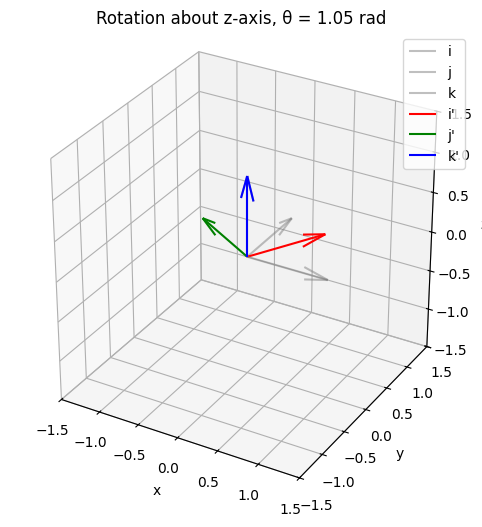

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Standard basis
e1 = np.array([1.0, 0.0, 0.0])  # i-hat
e2 = np.array([0.0, 1.0, 0.0])  # j-hat
e3 = np.array([0.0, 0.0, 1.0])  # k-hat


#---------------------------------------------------------------
"""
TASK: Fill up the rotation matrix based on the given information of
the standard basis vectors and the new rotated basis vectors
"""
def Rz(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([
        [ ,  ,  ],
        [ ,  ,  ],
        [ ,  ,  ],
    ])
#---------------------------------------------------------------

# function that multiplies the rotation matrix and plot the solution
# No need adjustment in the function except for the TASK
def plot_basis_and_rotated_z(theta):
    R = Rz(theta)

    e1p = R @ e1
    e2p = R @ e2
    e3p = R @ e3

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection="3d")

    # Original basis (gray)
    ax.quiver(0, 0, 0, e1[0], e1[1], e1[2], color="gray", alpha=0.5, label="i")
    ax.quiver(0, 0, 0, e2[0], e2[1], e2[2], color="gray", alpha=0.5, label="j")
    ax.quiver(0, 0, 0, e3[0], e3[1], e3[2], color="gray", alpha=0.5, label="k")


#---------------------------------------------------------------
    """
    TASK: Plot the transformed basis vectors along side with the original basis vectors ijk
    """
    # Rotated basis (colored)
    ax.quiver(0, 0, 0, e1p[0], e1p[1], e1p[2], color="r", label="i'")
    ax.quiver(0, 0, 0, e2p[0], e2p[1], e2p[2], color="g", label="j'")
    ax.quiver(0, 0, 0, e3p[0], e3p[1], e3p[2], color="b", label="k'")
#---------------------------------------------------------------


    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_box_aspect([1, 1, 1])
    ax.set_title(f"Rotation about z-axis, θ = {theta:.2f} rad")
    ax.legend()
    plt.show()


#---------------------------------------------------------------
"""
TASK: Explore the rotation operator.
Make sure your matrix is rotating in the proper basis
Then plot the basis vectors that rotates by theta = pi/3
"""
theta = 
plot_basis_and_rotated_z(theta)
#---------------------------------------------------------------


verfying the rotation matrix

In [ ]:
import numpy as np

sqrt3 = np.sqrt(3.0)

# Recall the same vector u and v that was defined previously in the previous part
u = np.array([2.0, 2.0, 2.0])
v = np.array([1.0 - sqrt3, 1.0 + sqrt3, 2.0])

# Selecting pi/3 as the rotation angle
theta = np.pi / 3
Rz_pi3 = Rz(theta)

Rz_u = Rz_pi3 @ u

"""
TASK: Check that vector v is also the same vector as would have been
given by rotating vector u along z axis by an angle of pi/3 rad

Show that vector v is equivalent to vector Rz_u, and print out the comparison
"""


Rz(pi/3) @ u = [-0.73205081  2.73205081  2.        ]
v           = [-0.73205081  2.73205081  2.        ]
Matches? -> True


Task 3 (optional)

## 🧱 Task 3 — Why Rotations Are Special (Optional Reading)

In Part 1, you saw other matrices $B$ that also satisfy
$$
B\vec{u} = \vec{v},
$$
but are **not** rotations.

In this task, we will focus on one specific example of a linear transformation
$$
T =
\begin{bmatrix}
0.22414387 & 0.22414387 & 0 \\
0.35355339 & 0.35355339 & 0 \\
0.83651630 & 0.83651630 & 0
\end{bmatrix}.
$$

This matrix $T$ is **not** a rotation: among other things, its columns are linearly dependent and its third column is zero, so it cannot be invertible.

We will compare $T$ to the genuine rotation matrix
$$
R_z\!\left(\frac{\pi}{3}\right),
$$
which you derived in Task 1.

### Your tasks:

1. Using Python:
   - Compute the **rank** of $T$ and of $R_z(\pi/3)$.
   - Test the effect of $T$ and $R_z(\pi/3)$ on several different vectors (not just $\vec{u}$).

2. Compare the results:
   - Does $T$ preserve the **length** (norm) of vectors?
   - Does $T$ preserve **angles** between different vectors?
   - What happens to vectors that are not multiples of any special direction?

3. Conceptual questions (answer in words, supported by your experiments):
   - What does it mean for a matrix to be **full rank**?  
     How is this related to whether the transformation is invertible?
   - What is the **span** of the image of a rank-deficient matrix like $T$?
   - What does it mean for a transformation (like a rotation) to be **orthogonal**?
   - How does a rotation give you the **same coordinates in a rotated basis**, as opposed to collapsing directions like a projection?

The key idea: a rotation such as $R_z(\pi/3)$ preserves lengths, angles, and the full 3D structure, while a rank-deficient matrix like $T$ generally collapses many different vectors into a lower-dimensional subspace and distorts distances and angles.


In [13]:
import numpy as np
from numpy.linalg import norm, matrix_rank

sqrt3 = np.sqrt(3.0)

u = np.array([2.0, 2.0, 2.0])
v = np.array([1.0 - sqrt3, 1.0 + sqrt3, 2.0])

def Rz(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([
        [c, -s, 0.0],
        [s,  c, 0.0],
        [0.0, 0.0, 1.0],
    ])

theta = np.pi / 3
Rz_pi3 = Rz(theta)

T = np.array([
    [0.22414387, 0.22414387, 0.0],
    [0.35355339, 0.35355339, 0.0],
    [0.83651630, 0.83651630, 0.0],
])

print("Rank(T)        =", matrix_rank(T))
print("Rank(Rz(pi/3)) =", matrix_rank(Rz_pi3))

# helper
def angle_between(x, y):
    nx = norm(x)
    ny = norm(y)
    if nx == 0 or ny == 0:
        return np.nan
    cosang = np.clip(np.dot(x, y) / (nx * ny), -1.0, 1.0)
    return np.arccos(cosang)

# Test on several vectors
rng = np.random.default_rng(0)

def test_on_vector(x, name="x"):
    Tx = T @ x
    Rz_x = Rz_pi3 @ x

    print(f"\nVector {name} =", x)
    print("  T @", name, "  =", Tx)
    print("  Rz @", name, " =", Rz_x)

    print("  ||", name, "||     =", norm(x))
    print("  ||T", name, "||    =", norm(Tx))
    print("  ||Rz", name, "||   =", norm(Rz_x))

    ang_T = angle_between(x, Tx)
    ang_Rz = angle_between(x, Rz_x)

    print("  angle(", name, ", T", name, ")  =", ang_T, "rad")
    print("  angle(", name, ", Rz", name, ") =", ang_Rz, "rad")

test_on_vector(u, "u")

for i in range(3):
    x = rng.normal(size=3)
    test_on_vector(x, f"x{i}")


Rank(T)        = 1
Rank(Rz(pi/3)) = 3

Vector u = [2. 2. 2.]
  T @ u   = [0.89657548 1.41421356 3.3460652 ]
  Rz @ u  = [-0.73205081  2.73205081  2.        ]
  || u ||     = 3.4641016151377544
  ||T u ||    = 3.7416573743831947
  ||Rz u ||   = 3.464101615137755
  angle( u , T u )  = 0.5097396759093511 rad
  angle( u , Rz u ) = 0.84106867056793 rad

Vector x0 = [ 0.12573022 -0.13210486  0.64042265]
  T @ x0   = [-0.00142884 -0.00225378 -0.00533249]
  Rz @ x0  = [0.17727128 0.04283313 0.64042265]
  || x0 ||     = 0.6658835893774567
  ||T x0 ||    = 0.005962931747214742
  ||Rz x0 ||   = 0.6658835893774567
  angle( x0 , T x0 )  = 2.550513241694925 rad
  angle( x0 , Rz x0 ) = 0.2747439829095586 rad

Vector x1 = [ 0.10490012 -0.53566937  0.36159505]
  T @ x1   = [-0.09655429 -0.15229993 -0.3603455 ]
  Rz @ x1  = [ 0.51635334 -0.17698852  0.36159505]
  || x1 ||     = 0.6547493380344361
  ||T x1 ||    = 0.40294774085004054
  ||Rz x1 ||   = 0.6547493380344361
  angle( x1 , T x1 )  = 1.795731005

Task 4 x-Rotation 

## 🔁 Task 4 — Rotating Around the $x$-Axis

Now repeat the basis-rotation idea, but around the $x$-axis.

Consider a rotation around the $x$-axis by an angle $\theta$. This defines a new basis
$$
\hat{i}'',\ \hat{j}'',\ \hat{k}'',
$$
where:

- $\hat{i}'' = \hat{i}$ (rotation around the $x$-axis leaves the $x$-axis fixed),
- $\hat{j}''$ and $\hat{k}''$ are obtained by rotating $\hat{j}$ and $\hat{k}$ in the $yz$-plane by $\theta$.

### Your tasks:

1. Express $\hat{j}''$ and $\hat{k}''$ as linear combinations of $\hat{j}, \hat{k}$ and hence of $\hat{i},\hat{j},\hat{k}$.

2. Derive the rotation matrix $R_x(\theta)$ such that
   $$
   \begin{bmatrix}
   \hat{i}'' & \hat{j}'' & \hat{k}''
   \end{bmatrix}
   =
   R_x(\theta)
   \begin{bmatrix}
   \hat{i} & \hat{j} & \hat{k}
   \end{bmatrix}.
   $$

3. Again, set $\theta = \pi/3$ and verify numerically that
   $$
   R_x\!\left(\frac{\pi}{3}\right)\vec{u} = \vec{w},
   $$
   where
   $$
   \vec{w} =
   \begin{bmatrix}
   2 \\
   1-\sqrt{3} \\
   1+\sqrt{3}
   \end{bmatrix}.
   $$

4. Plot the original basis and the rotated basis $(\hat{i}'',\hat{j}'',\hat{k}'')$ to visualise the effect of rotation about the $x$-axis.

Rx(pi/3) @ u = [ 2.         -0.73205081  2.73205081]
w           = [ 2.         -0.73205081  2.73205081]
Matches? -> True


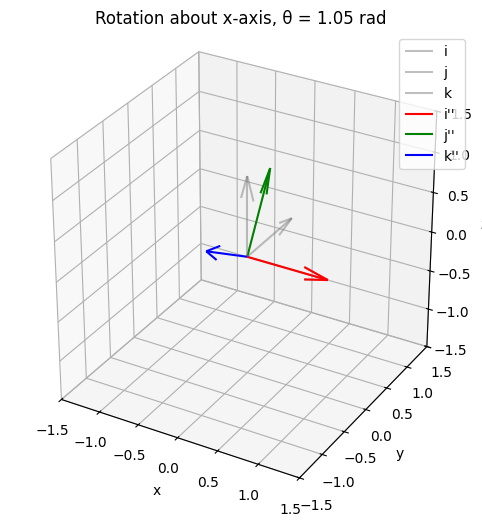

In [ ]:
#---------------------------------------------------------------
"""
TASK: Fill up the rotation matrix based on the given information of
the standard basis vectors and the new rotated basis vectors
"""
def Rx(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([
        [ ,  ,  ],
        [ ,  ,  ],
        [ ,  ,  ],
    ])
#---------------------------------------------------------------


# Selecting pi/3 as the rotation angle
theta = np.pi / 3
Rx_pi3 = Rx(theta)

# Recall the same vector u and w that was defined previously in the previous part
u = np.array([2.0, 2.0, 2.0])
w = np.array([2.0, 1.0 - sqrt3, 1.0 + sqrt3])

Rx_u = Rx_pi3 @ u


#---------------------------------------------------------------
"""
TASK: Check that vector w is also the same vector as would have been
given by rotating vector u along z axis by an angle of pi/3 rad

Show that vector w is equivalent to vector Rx_u, and print out the comparison
"""
#---------------------------------------------------------------

In [ ]:
# Standard basis
e1 = np.array([1.0, 0.0, 0.0])  # i-hat
e2 = np.array([0.0, 1.0, 0.0])  # j-hat
e3 = np.array([0.0, 0.0, 1.0])  # k-hat

def plot_basis_and_rotated_x(theta):
    R = Rx(theta)
    e1p = R @ e1
    e2p = R @ e2
    e3p = R @ e3

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection="3d")

    ax.quiver(0, 0, 0, e1[0], e1[1], e1[2], color="gray", alpha=0.5, label="i")
    ax.quiver(0, 0, 0, e2[0], e2[1], e2[2], color="gray", alpha=0.5, label="j")
    ax.quiver(0, 0, 0, e3[0], e3[1], e3[2], color="gray", alpha=0.5, label="k")


#---------------------------------------------------------------
    """
    TASK: Plot the transformed basis vectors along side with the original basis vectors ijk
    """
    # Rotated basis (colored)
    ax.quiver(0, 0, 0, , , , color="r", label="i'")
    ax.quiver(0, 0, 0, , , , color="g", label="j'")
    ax.quiver(0, 0, 0, , , , color="b", label="k'")
#---------------------------------------------------------------


    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_box_aspect([1, 1, 1])
    ax.set_title(f"Rotation about x-axis, θ = {theta:.2f} rad")
    ax.legend()
    plt.show()

plot_basis_and_rotated_x(np.pi / 3)


Task 5 Linearity of Transformation

## ➕ Task 5 — Combining Rotations: Linearity of Transformations

We now combine the two rotations $R_z$ and $R_x$.

Let
$$
R_z = R_z\!\left(\frac{\pi}{3}\right),\qquad
R_x = R_x\!\left(\frac{\pi}{3}\right).
$$

Define a new matrix
$$
A_{\text{rot}} = \frac{1}{\sqrt{2}}R_z + \frac{1}{\sqrt{2}}R_x.
$$

Recall from Part 1 that you defined
$$
\vec{s}=\frac{1}{\sqrt{2}}\vec{v}+\frac{1}{\sqrt{2}}\vec{w},
$$
and also constructed a matrix $A$ (from matrices $B$ and $C$) such that $A\vec{u} = \vec{s}$.

### Your tasks:

1. Compute $A_{\text{rot}}\vec{u}$ and check that
   $$
   A_{\text{rot}}\vec{u} = \vec{s}.
   $$

2. Compare $A_{\text{rot}}$ with your earlier matrix $A$ from Part 1:
   - Use `np.allclose(A_rot, A)` in Python.
   - Do they match numerically?
   - What does this tell you about combining rotations vs. combining the corresponding linear transformations that mapped $\vec{u}$ to $\vec{v}$ and $\vec{u}$ to $\vec{w}$?

This shows that even when you combine transformations linearly, the resulting map is still linear and can be related back to how it acts on the basis.


In [ ]:
# Recall the same vectors s, u, v,and w that was defined previously in the previous part
u = np.array([2.0, 2.0, 2.0])
v = np.array([1.0 - sqrt3, 1.0 + sqrt3, 2.0])
w = np.array([2.0, 1.0 - sqrt3, 1.0 + sqrt3])
s = v / np.sqrt(2.0) + w / np.sqrt(2.0)

Rz_pi3 = Rz(np.pi / 3)
Rx_pi3 = Rx(np.pi / 3)

# Linear combination of transformations (Rotations)
A_rot = (Rz_pi3 + Rx_pi3) / np.sqrt(2.0)

A_rot_u = A_rot @ u

print("A_rot @ u =", A_rot_u)
print("s         =", s)
print("Matches? ->", np.allclose(A_rot_u, s))


#---------------------------------------------------------------
"""
TASK: Check that vector s is also the same vector as would have been
given by rotating vector u along a linear combination of x-z axis by an angle of pi/3 rad

Show that vector s is equivalent to vector A_rot_u, and print out the comparison
"""
#---------------------------------------------------------------


# If you have A from Part 1:
# print("A_rot vs A? ->", np.allclose(A_rot, A))


A_rot @ u = [0.89657547 1.41421356 3.34606521]
s         = [0.89657547 1.41421356 3.34606521]
Matches? -> True


## 🎥 Task 6 — Visualising What $A(\theta)$ Does (Sit back and watch some animation :))

Finally, we want to **see** what the combined transformation does as we vary the rotation angle.

Consider a time-dependent angle
$$
\theta(t) = \omega t,
$$
for $t$ going from $0$ to some final time such that $\theta$ goes from $0$ to $\pi/3$.

For each angle $\theta$, define
$$
R_z(\theta),\quad R_x(\theta),\quad
A(\theta) = \frac{1}{\sqrt{2}}R_z(\theta) + \frac{1}{\sqrt{2}}R_x(\theta).
$$

### Your tasks:

1. For a sequence of angles $\theta_0, \theta_1, \dots, \theta_N$ from $0$ to $\pi/3$:
   - Apply $A(\theta_k)$ to:
     - the basis vectors $\hat{i},\hat{j},\hat{k}$,
     - and/or to one or more test vectors (for example $\vec{u}$).
   - Store the transformed vectors.

2. Use Python (e.g. `matplotlib.animation.FuncAnimation` or by saving frames and using `imageio`) to create a **GIF** that shows:
   - the original basis,
   - the transformed basis $A(\theta)\hat{i}, A(\theta)\hat{j}, A(\theta)\hat{k}$ and/or the trajectory of $\vec{u}$ under $A(\theta)$,
   - smoothly evolving as $\theta$ goes from $0$ to $\pi/3$.

3. In words, explain what you observe:
   - How does the transformation $A(\theta)$ move vectors?
   - At $\theta=0$, what is $A(0)$?
   - At $\theta=\pi/3$, how does $A(\pi/3)$ relate to the matrix $A$ from Part 1?

This final step ties everything together:  
you see how rotations of the **basis** induce transformations on **all vectors**, and how combining rotations produces a new linear transformation that still behaves consistently across the entire space.

Rotation for Different Angle

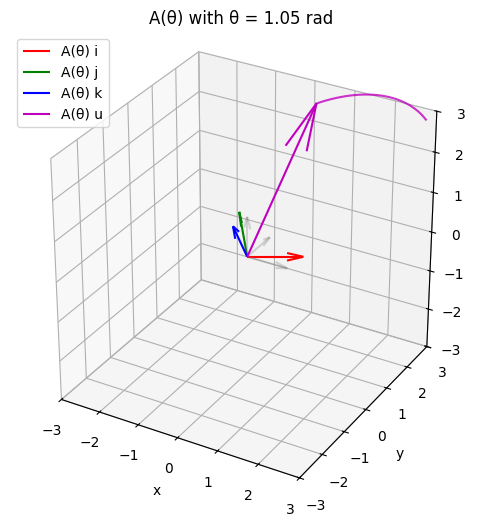

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- standard basis and vectors ---

e1 = np.array([1.0, 0.0, 0.0])
e2 = np.array([0.0, 1.0, 0.0])
e3 = np.array([0.0, 0.0, 1.0])

u = np.array([2.0, 2.0, 2.0])

def Rz(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([
        [c, -s, 0.0],
        [s,  c, 0.0],
        [0.0, 0.0, 1.0],
    ])

def Rx(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([
        [1.0, 0.0, 0.0],
        [0.0,  c, -s],
        [0.0,  s,  c],
    ])

def A_theta(theta):
    return (Rz(theta) + Rx(theta)) / np.sqrt(2.0)

# --- animation setup ---

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")

thetas = np.linspace(0.0, np.pi / 3.0, 60)

# store past positions of A(theta) u
path_points = []

def init():
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(-3, 3)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_box_aspect([1, 1, 1])
    return []

def update(theta):
    ax.cla()
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(-3, 3)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_box_aspect([1, 1, 1])

    # original basis (faint)
    ax.quiver(0, 0, 0, e1[0], e1[1], e1[2], color="gray", alpha=0.3)
    ax.quiver(0, 0, 0, e2[0], e2[1], e2[2], color="gray", alpha=0.3)
    ax.quiver(0, 0, 0, e3[0], e3[1], e3[2], color="gray", alpha=0.3)

    # current transformation
    A = A_theta(theta)

    # transformed basis
    e1p = A @ e1
    e2p = A @ e2
    e3p = A @ e3

    ax.quiver(0, 0, 0, e1p[0], e1p[1], e1p[2], color="r", label="A(θ) i")
    ax.quiver(0, 0, 0, e2p[0], e2p[1], e2p[2], color="g", label="A(θ) j")
    ax.quiver(0, 0, 0, e3p[0], e3p[1], e3p[2], color="b", label="A(θ) k")

    # transformed u and path
    u_img = A @ u
    path_points.append(u_img.copy())          # keep history
    path_arr = np.array(path_points)

    # current arrow for A(θ) u
    ax.quiver(0, 0, 0, u_img[0], u_img[1], u_img[2],
              color="m", label="A(θ) u")

    # trajectory line
    ax.plot(path_arr[:,0], path_arr[:,1], path_arr[:,2],
            color="m", linestyle="-", linewidth=1.5, alpha=0.8)

    ax.set_title(f"A(θ) with θ = {theta:.2f} rad")
    ax.legend(loc="upper left")
    return []

ani = FuncAnimation(fig, update, frames=thetas, init_func=init, blit=False)

# show inline in Jupyter
HTML(ani.to_jshtml())
